In [26]:
import pandas as pd
from mlxtend.frequent_patterns import apriori,association_rules
#from apyori import apriori
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx
import plotly.express as px

In [2]:
df = pd.read_csv("H:\\study\\Association Rules\\Assignments\\my_movies.csv")

In [3]:
df

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


In [24]:
df_movies = df.iloc[:,5:]

In [25]:
df_movies

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0
5,1,1,0,0,1,0,0,0,0,0
6,0,0,0,1,0,0,1,0,0,0
7,0,1,0,0,1,0,0,0,0,0
8,1,1,0,0,1,0,0,0,0,0
9,1,1,0,0,0,0,0,1,0,1


In [27]:
frequencies_of_movies = apriori(df_movies,min_support=0.075,max_len=4,use_colnames=True)

In [28]:
frequencies_of_movies

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.1,(Harry Potter2)
7,0.1,(LOTR)
8,0.1,(Braveheart)
9,0.2,(Green Mile)


<ipython-input-46-63a547c9ec20>:3: MatplotlibDeprecationWarning:

Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.



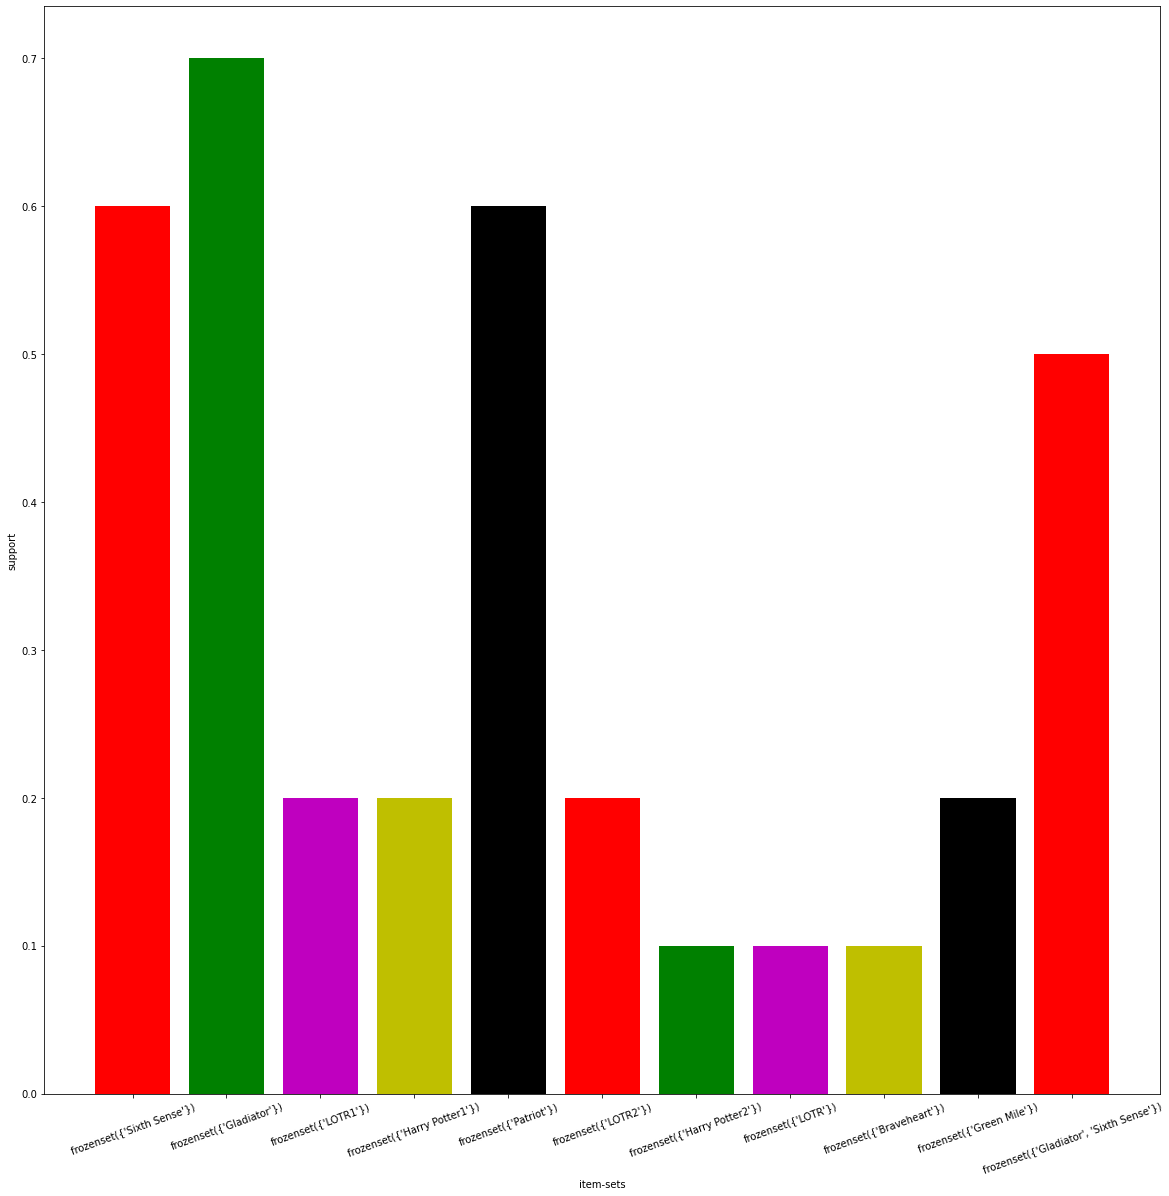

In [46]:
plt.figure(figsize=(20,20),)

plt.bar(x = list(range(0, 11)), height = frequencies_of_movies.support[0:11], color ='rgmyk')
plt.xticks(list(range(0, 11)), frequencies_of_movies.itemsets[0:11], rotation=20)
plt.xlabel('item-sets')
plt.ylabel('support')
plt.show()

In [34]:
df_asso_rules = association_rules(frequencies_of_movies,metric='conviction',min_threshold=1)

In [35]:
df_asso_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
2,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
4,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.000000,1.666667,0.04,inf
...,...,...,...,...,...,...,...,...,...
203,"(Harry Potter1, LOTR2)","(LOTR1, Green Mile)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
204,(LOTR1),"(Green Mile, Harry Potter1, LOTR2)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8
205,(Green Mile),"(LOTR1, Harry Potter1, LOTR2)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8
206,(Harry Potter1),"(LOTR1, LOTR2, Green Mile)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8


In [51]:
px.scatter(df_asso_rules.iloc[:,2:],x='conviction',y='lift')

In [52]:
px.scatter(df_asso_rules.iloc[:,2:],x='support',y='confidence')